# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

import mlflow
import mlflow.sklearn

In [3]:
mushroom = pd.read_csv('../data/raw/02_mushroom_data.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


# Data Exploration

In [4]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,7932
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,6
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
mushroom.isna().sum()

class                         0
cap-shape                     0
cap-surface                   0
cap-color                     0
bruises                       0
odor                          0
gill-attachment               0
gill-spacing                  0
gill-size                     0
gill-color                    0
stalk-shape                   0
stalk-root                    0
stalk-surface-above-ring      0
stalk-surface-below-ring      0
stalk-color-above-ring        0
stalk-color-below-ring        0
veil-type                     0
veil-color                    0
ring-number                   0
ring-type                     0
spore-print-color             0
population                    0
habitat                     192
dtype: int64

In [7]:
mushroom.duplicated().any()

False

edible       4208
poisonous    3916
Name: class, dtype: int64


<AxesSubplot: ylabel='class'>

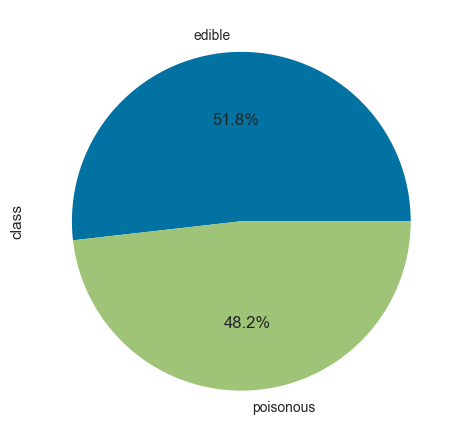

In [8]:
print(mushroom["class"].value_counts())
mushroom["class"].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [9]:
mushroom = mushroom.dropna()
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


woods      3148
grasses    2148
path       1144
leaves      832
urban       368
meadows     292
Name: habitat, dtype: int64


<AxesSubplot: >

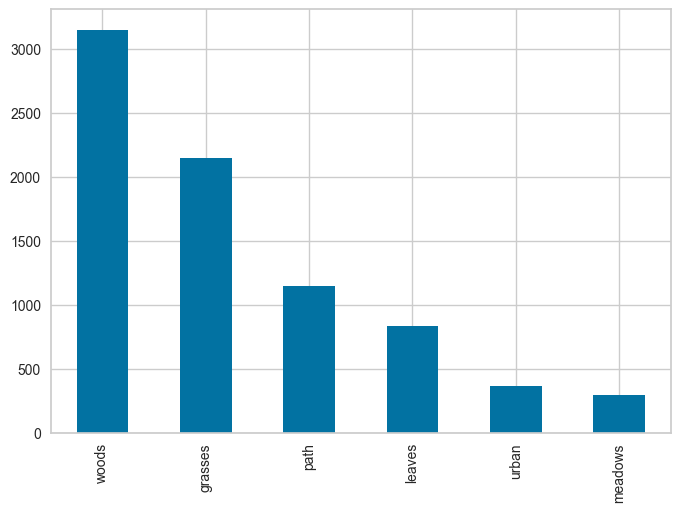

In [10]:
print(mushroom["habitat"].value_counts())
mushroom["habitat"].value_counts().plot(kind='bar')

several      4040
solitary     1712
scattered    1248
numerous      400
abundant      384
clustered     148
Name: population, dtype: int64


<AxesSubplot: >

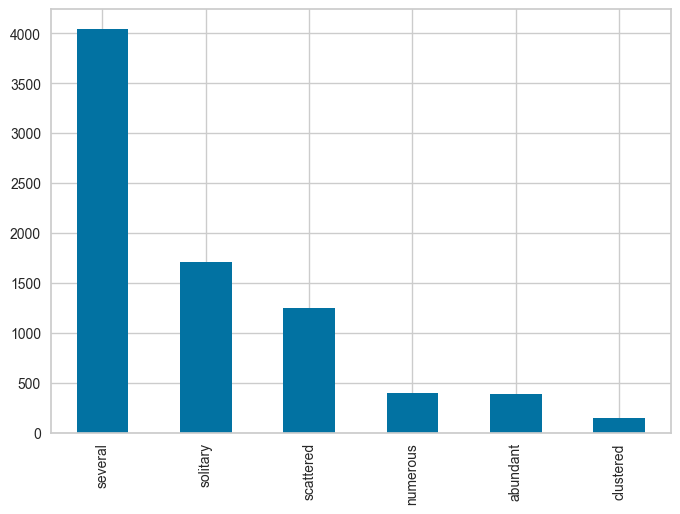

In [11]:
print(mushroom["population"].value_counts())
mushroom["population"].value_counts().plot(kind='bar')

In [12]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,...,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932
unique,2,6,4,10,2,9,2,2,2,11,...,4,8,8,1,4,3,5,9,6,6
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4016,3592,3148,2236,4748,3336,7722,6620,5420,1728,...,4744,4368,4288,7932,7732,7488,3968,2196,4040,3148


In [13]:
mushroom['class'].unique()

array(['poisonous', 'edible'], dtype=object)

## PyCaret

In [14]:
mr_setup = setup(mushroom, target = 'class', train_size=0.8, session_id=123, transformation=True,
                 normalize=True, log_experiment=True, experiment_name='mushroom', remove_outliers=True, fold=10)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(7932, 23)"
5,Transformed data shape,"(7614, 108)"
6,Transformed train set shape,"(6027, 108)"
7,Transformed test set shape,"(1587, 108)"
8,Ordinal features,5
9,Categorical features,22


In [15]:
#Print ordinal, numeric and categorical features
print(f'Ordinal features: {mr_setup._fxs["Ordinal"]}')
print(f'Categorical features: {mr_setup._fxs["Categorical"]}')

Ordinal features: {'bruises': ['bruises', 'no'], 'gill-attachment': ['attached', 'free'], 'gill-spacing': ['close', 'crowded'], 'gill-size': ['broad', 'narrow'], 'stalk-shape': ['enlarging', 'tapering']}
Categorical features: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [16]:
mr_transformed = mr_setup.get_config('dataset_transformed')
mr_transformed

,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_bell,cap-shape_conical,cap-shape_sunken,cap-surface_scaly,cap-surface_smooth,cap-surface_fibrous,cap-surface_grooves,...,population_numerous,population_abundant,population_clustered,habitat_woods,habitat_path,habitat_grasses,habitat_meadows,habitat_urban,habitat_leaves,class
2580,1.079292,-0.801674,-0.315939,-0.234046,-0.012882,-0.06323,1.223391,-0.650493,-0.657474,-0.01822,...,-0.234046,-0.229676,-0.025771,1.204159,-0.410182,-0.628858,-0.195558,-0.226455,-0.292497,0
3132,-0.926534,1.247389,-0.315939,-0.234046,-0.012882,-0.06323,1.223391,-0.650493,-0.657474,-0.01822,...,-0.234046,-0.229676,-0.025771,1.204159,-0.410182,-0.628858,-0.195558,-0.226455,-0.292497,0
6585,-0.926534,1.247389,-0.315939,-0.234046,-0.012882,-0.06323,-0.817400,1.537297,-0.657474,-0.01822,...,-0.234046,-0.229676,-0.025771,-0.830455,2.437939,-0.628858,-0.195558,-0.226455,-0.292497,1
4184,1.079292,-0.801674,-0.315939,-0.234046,-0.012882,-0.06323,-0.817400,-0.650493,1.520973,-0.01822,...,-0.234046,-0.229676,-0.025771,-0.830455,-0.410182,1.590185,-0.195558,-0.226455,-0.292497,1
2829,1.079292,-0.801674,-0.315939,-0.234046,-0.012882,-0.06323,1.223391,-0.650493,-0.657474,-0.01822,...,-0.234046,-0.229676,-0.025771,1.204159,-0.410182,-0.628858,-0.195558,-0.226455,-0.292497,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7193,1.079292,-0.801674,-0.315939,-0.234046,-0.012882,-0.06323,1.223391,-0.650493,-0.657474,-0.01822,...,-0.234046,-0.229676,-0.025771,-0.830455,2.437939,-0.628858,-0.195558,-0.226455,-0.292497,1
1244,-0.926534,1.247389,-0.315939,-0.234046,-0.012882,-0.06323,-0.817400,1.537297,-0.657474,-0.01822,...,-0.234046,-0.229676,-0.025771,-0.830455,-0.410182,1.590185,-0.195558,-0.226455,-0.292497,0
4823,1.079292,-0.801674,-0.315939,-0.234046,-0.012882,-0.06323,-0.817400,-0.650493,1.520973,-0.01822,...,-0.234046,-0.229676,-0.025771,-0.830455,-0.410182,1.590185,-0.195558,-0.226455,-0.292497,1
7166,-0.926534,1.247389,-0.315939,-0.234046,-0.012882,-0.06323,1.223391,-0.650493,-0.657474,-0.01822,...,-0.234046,-0.229676,38.803995,1.204159,-0.410182,-0.628858,-0.195558,-0.226455,-0.292497,1


In [17]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9981,1.0000,0.9981,0.9981,0.9981,0.9962,0.9962,0.9460
et,Extra Trees Classifier,0.9956,1.0000,0.9956,0.9956,0.9956,0.9912,0.9912,0.9570
xgboost,Extreme Gradient Boosting,0.9954,1.0000,0.9954,0.9955,0.9954,0.9909,0.9909,0.9970
lightgbm,Light Gradient Boosting Machine,0.9940,0.9950,0.9940,0.9941,0.9940,0.9880,0.9881,1.2010
lr,Logistic Regression,0.9896,0.9988,0.9896,0.9899,0.9896,0.9792,0.9795,1.9530
ada,Ada Boost Classifier,0.9880,0.9952,0.9880,0.9884,0.9880,0.9760,0.9764,0.9650
qda,Quadratic Discriminant Analysis,0.9879,0.9880,0.9879,0.9883,0.9879,0.9757,0.9762,0.7930
catboost,CatBoost Classifier,0.9871,0.9999,0.9871,0.9875,0.9871,0.9742,0.9745,3.2100
svm,SVM - Linear Kernel,0.9868,0.0000,0.9868,0.9873,0.9868,0.9735,0.9740,0.8250
ridge,Ridge Classifier,0.9868,0.0000,0.9868,0.9872,0.9868,0.9735,0.9739,0.7930


In [18]:
best.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [20]:
tuned_rf = tune_model(best, return_tuner=True) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9937,0.9937,0.9937,0.9937,0.9937,0.9874,0.9874
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9984,0.9999,0.9984,0.9984,0.9984,0.9968,0.9969
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9921,0.9937,0.9921,0.9922,0.9921,0.9843,0.9843
5,0.9968,0.9969,0.9968,0.9969,0.9968,0.9937,0.9937
6,0.9953,0.9983,0.9953,0.9953,0.9953,0.9905,0.9905
7,0.9968,0.9984,0.9968,0.9968,0.9968,0.9937,0.9937
8,0.9984,0.9984,0.9984,0.9984,0.9984,0.9968,0.9969


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [21]:
tuned_rf

(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=123, verbose=0, warm_start=False),
 RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                    error_score=nan,
                    estimator=Pipeline(memory=Memory(location=None),
                                       steps=[('label_encoding',
                                               TransformerWrapperWithInverse(exclude=None,
                                                                             include=None,
                                                        

In [22]:
best_rf = tuned_rf[0]

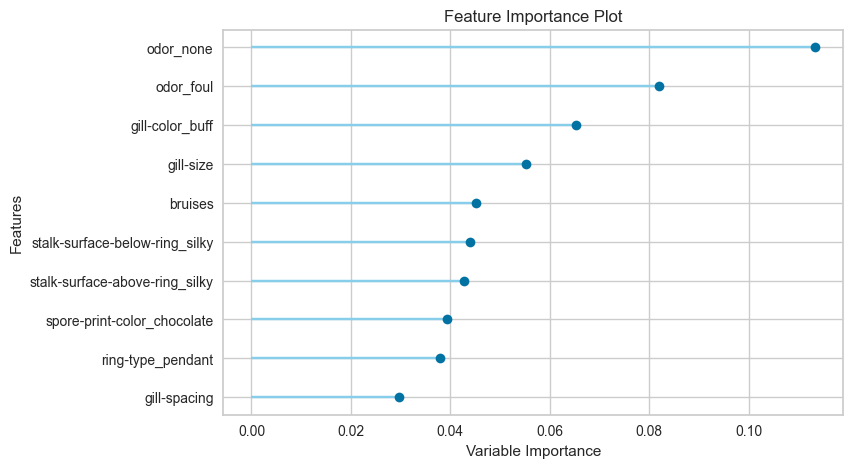

In [23]:
plot_model(best_rf, plot = 'feature')

# Prediction

In [24]:
mr_pred = predict_model(best_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9981,1.0000,0.9981,0.9981,0.9981,0.9962,0.9962


In [25]:
mr_pred.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,prediction_label,prediction_score
740,convex,fibrous,brown,no,none,free,close,narrow,pink,enlarging,...,partial,white,one,pendant,black,several,urban,edible,edible,1.0
4366,convex,scaly,yellow,no,foul,free,close,broad,pink,enlarging,...,partial,white,one,large,chocolate,solitary,path,poisonous,poisonous,1.0
2575,convex,scaly,brown,bruises,none,free,close,broad,brown,tapering,...,partial,white,one,pendant,black,solitary,woods,edible,edible,1.0
7642,knobbed,fibrous,gray,no,none,free,crowded,broad,gray,enlarging,...,partial,white,two,pendant,white,numerous,grasses,edible,edible,1.0
1634,convex,smooth,brown,no,none,free,crowded,broad,chocolate,tapering,...,partial,white,one,evanescent,black,abundant,grasses,edible,edible,1.0


In [26]:
final_rf = finalize_model(best_rf)

In [27]:
save_model(final_rf, 'mushroom_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbo...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                 

In [28]:
#Final Random Forest model parameters for deployment
load_pipeline = load_model('mushroom_pipeline')
load_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\USER\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              m...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

# MLFLOW UI

In [29]:
!mlflow ui

^C


In [30]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [31]:
# set the experiment id
mlflow.set_experiment(experiment_id="297215632804345769")
mlflow.autolog()

2024/02/22 23:18:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/02/22 23:18:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/02/22 23:18:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2024/02/22 23:18:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


In [34]:
# Calculate evaluation metrics
y_true = mr_pred['class']
y_pred = mr_pred['prediction_label']

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

accuracy = accuracy_score(y_true_encoded, y_pred_encoded)
auc = roc_auc_score(y_true_encoded, y_pred_encoded)
precision = precision_score(y_true_encoded, y_pred_encoded)
recall = recall_score(y_true_encoded, y_pred_encoded)
f1 = f1_score(y_true_encoded, y_pred_encoded)
mlflow.end_run()

# Register the pipeline with MLflow
with mlflow.start_run() as run:
    mlflow.log_param('train_size', 0.8)
    mlflow.log_param('transformation', True)
    mlflow.log_param('normalize', True)
    mlflow.log_param('remove_outliers', True)
    mlflow.log_param('fold', 5)

    # Log metrics
    mlflow.log_metric('Accuracy', accuracy)
    mlflow.log_metric('AUC', auc)
    mlflow.log_metric('Precision', precision)
    mlflow.log_metric('Recall', recall)
    mlflow.log_metric('F1-Score', f1)

    # Log the experiment name and run ID
    mlflow.set_experiment('mushroom')
    mlflow.log_param('experiment_name', 'mushroom')
    # mlflow.log_param('run_id', run.info.run_id)
    
    # Log the pipeline object using mlflow.sklearn
    mlflow.sklearn.log_model(sk_model=best_rf, registered_model_name='mushroom_model', artifact_path='sk_model')


Successfully registered model 'mushroom_model'.
2024/02/22 23:24:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: mushroom_model, version 1
Created version '1' of model 'mushroom_model'.
